In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from geopandas import GeoDataFrame
from shapely.geometry import Point

train_df = pd.read_csv('train.csv')
train_df["flat_type"] = train_df["flat_type"].str.replace('-',' ')
train_df.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4 room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3 room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3 room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rent_approval_date   60000 non-null  object 
 1   town                 60000 non-null  object 
 2   block                60000 non-null  object 
 3   street_name          60000 non-null  object 
 4   flat_type            60000 non-null  object 
 5   flat_model           60000 non-null  object 
 6   floor_area_sqm       60000 non-null  float64
 7   furnished            60000 non-null  object 
 8   lease_commence_date  60000 non-null  int64  
 9   latitude             60000 non-null  float64
 10  longitude            60000 non-null  float64
 11  elevation            60000 non-null  float64
 12  subzone              60000 non-null  object 
 13  planning_area        60000 non-null  object 
 14  region               60000 non-null  object 
 15  monthly_rent         60000 non-null 

In [3]:
print("Number of unique town: ", len(np.unique(train_df["town"])))
print("Number of unique block: ", len(np.unique(train_df["block"])))
print("Number of unique street name: ", len(np.unique(train_df["street_name"])))
print("Number of unique flat type: ", len(np.unique(train_df["flat_type"])))
print("Number of unique flat model: ", len(np.unique(train_df["flat_model"])))
print("Number of unique furnished: ", len(np.unique(train_df["furnished"])))
print("Number of unique elevation: ", len(np.unique(train_df["elevation"])))
print("Number of unique subzone: ", len(np.unique(train_df["subzone"])))
print("Number of unique planning area: ", len(np.unique(train_df["planning_area"])))
print("Number of unique region: ", len(np.unique(train_df["region"])))

Number of unique town:  26
Number of unique block:  2553
Number of unique street name:  1083
Number of unique flat type:  5
Number of unique flat model:  19
Number of unique furnished:  1
Number of unique elevation:  1
Number of unique subzone:  152
Number of unique planning area:  29
Number of unique region:  5


<Figure size 1000x400 with 0 Axes>

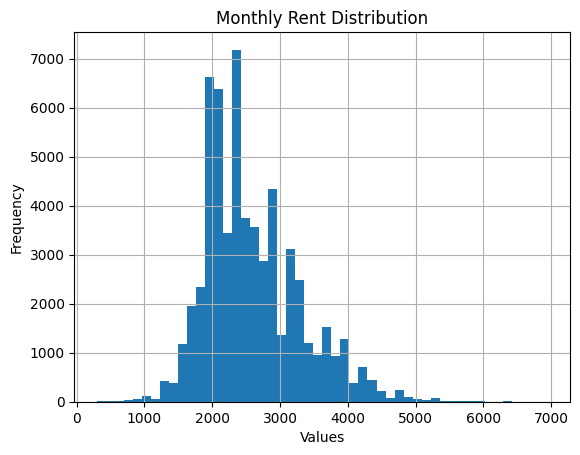

In [4]:
plt.figure(figsize=(10, 4))
train_df.hist(column='monthly_rent', bins=50)
plt.title('Monthly Rent Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

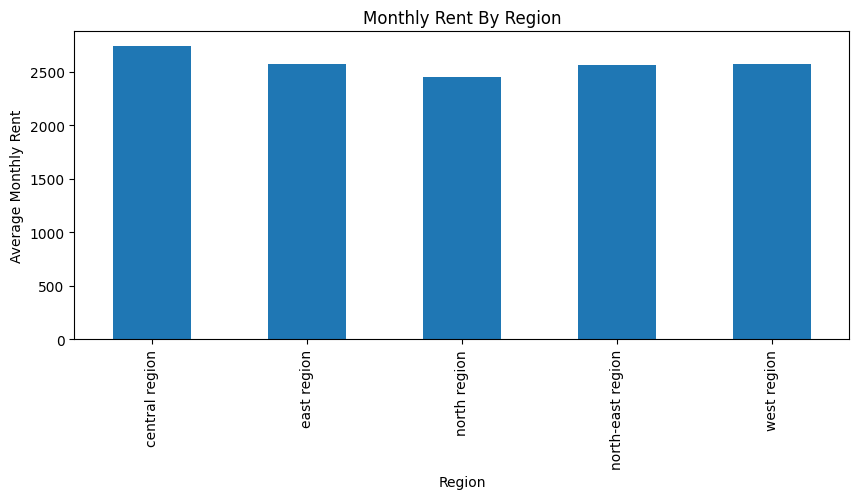

In [5]:
plt.figure(figsize=(10, 4))
train_df.groupby(['region'])['monthly_rent'].mean().plot(kind='bar')
plt.title('Monthly Rent By Region')
plt.xlabel('Region')
plt.ylabel('Average Monthly Rent')
plt.show()

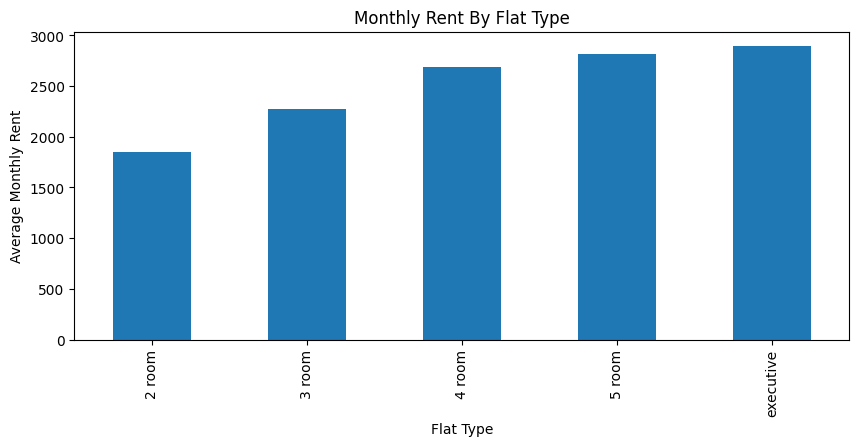

In [6]:
plt.figure(figsize=(10, 4))
train_df.groupby(['flat_type'])['monthly_rent'].mean().plot(kind='bar')
plt.title('Monthly Rent By Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Average Monthly Rent')
plt.show()

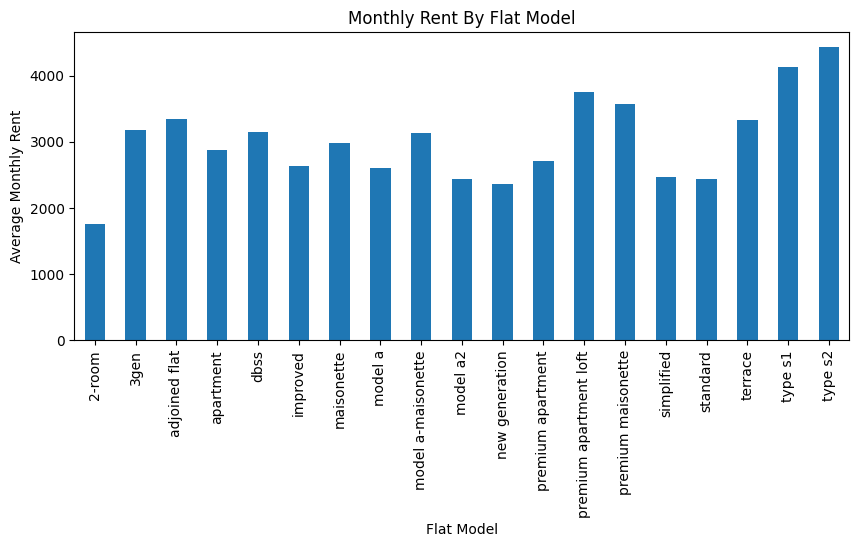

In [7]:
plt.figure(figsize=(10, 4))
train_df.groupby(['flat_model'])['monthly_rent'].mean().plot(kind='bar')
plt.title('Monthly Rent By Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Average Monthly Rent')
plt.show()

<Figure size 1000x400 with 0 Axes>

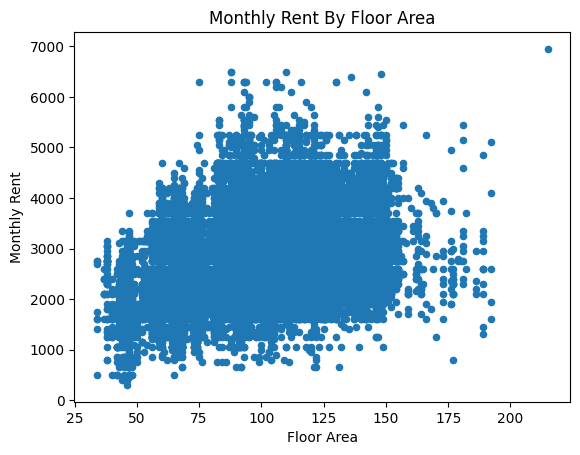

Correlation:  0.30646574550846056


In [8]:
plt.figure(figsize=(10, 4))
train_df.plot.scatter(x='floor_area_sqm', y='monthly_rent')
plt.title('Monthly Rent By Floor Area')
plt.xlabel('Floor Area')
plt.ylabel('Monthly Rent')
plt.show()
print("Correlation: ", np.corrcoef(train_df["floor_area_sqm"], train_df["monthly_rent"])[0][1])

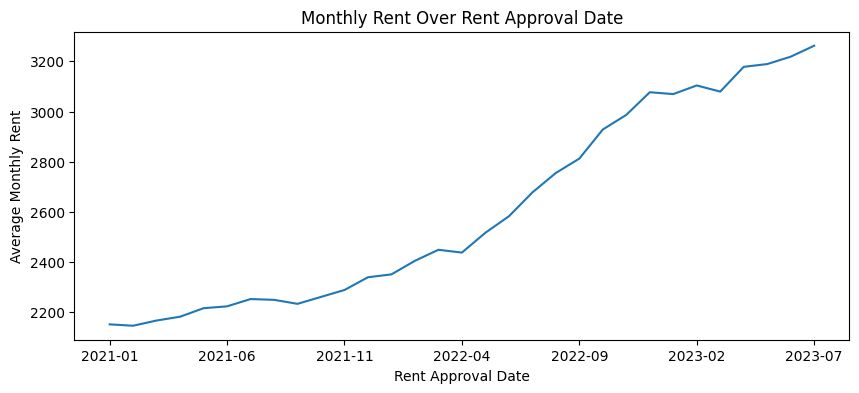

In [9]:
plt.figure(figsize=(10, 4))
train_df.groupby(['rent_approval_date'])['monthly_rent'].mean().plot(kind='line')
plt.title('Monthly Rent Over Rent Approval Date')
plt.xlabel('Rent Approval Date')
plt.ylabel('Average Monthly Rent')
plt.show()

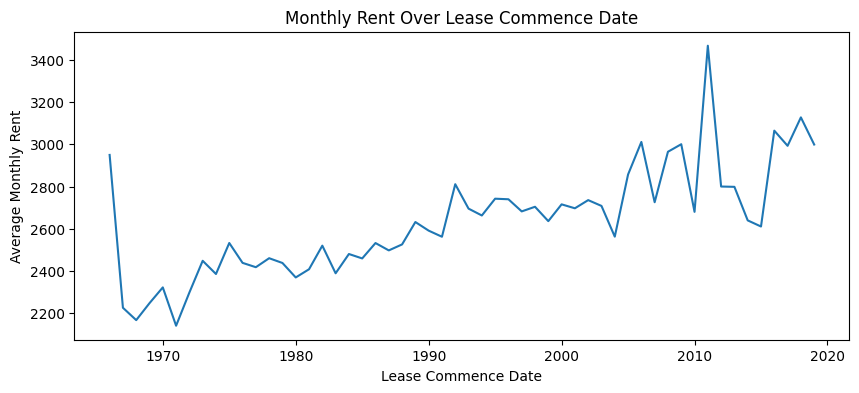

In [10]:
plt.figure(figsize=(10, 4))
train_df.groupby(['lease_commence_date'])['monthly_rent'].mean().plot(kind='line')
plt.title('Monthly Rent Over Lease Commence Date')
plt.xlabel('Lease Commence Date')
plt.ylabel('Average Monthly Rent')
plt.show()

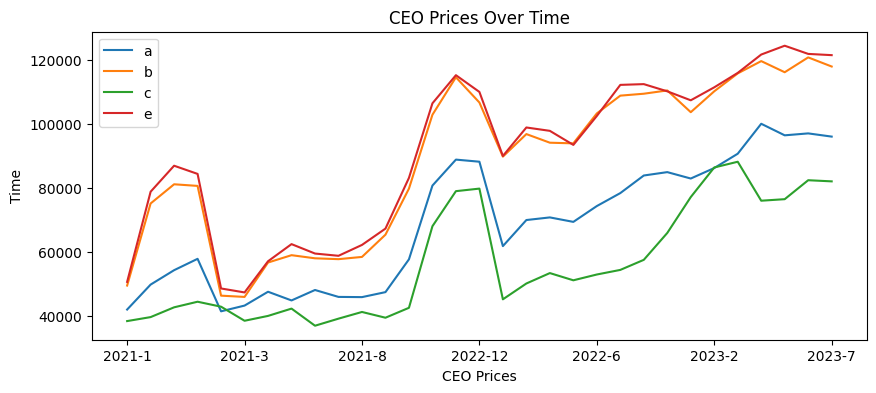

In [11]:
plt.figure(figsize=(10, 4))
ceo_prices_df = pd.read_csv("auxiliary-data/sg-coe-prices.csv")
ceo_prices_df = ceo_prices_df.replace({"month": {"january": 1, "february": 2, "march": 3, "april": 4, "may": 5, "june": 6, "july": 7, "august": 8, "september": 9, "october": 10, "november": 11, "december": 12}})
ceo_prices_df["date"] = ceo_prices_df['year'].astype(str) + "-" + ceo_prices_df['month'].astype(str)
cateogries = np.unique(ceo_prices_df["category"])
for category in cateogries:
    tmp_df = ceo_prices_df[ceo_prices_df["category"] == category]
    tmp_df.groupby(['date'])['price'].mean().plot(kind='line', label=category)
plt.title('CEO Prices Over Time')
plt.xlabel('CEO Prices')
plt.ylabel('Time')
plt.legend()
plt.show()

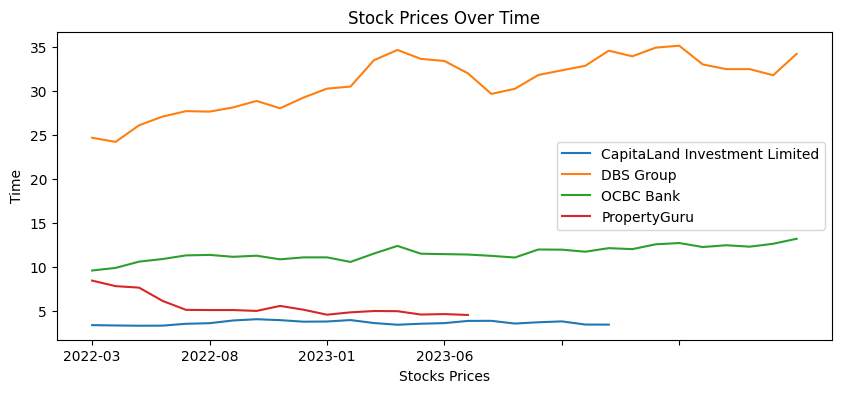

In [12]:
plt.figure(figsize=(10, 4))
stock_prices_df = pd.read_csv("auxiliary-data/sg-stock-prices.csv")
stock_prices_df = stock_prices_df[stock_prices_df["name"].isin(["DBS Group", "OCBC Bank", "CapitaLand Investment Limited", "PropertyGuru",])]
stock_prices_df["date"] = stock_prices_df["date"].str.slice(stop=7)
stocks = np.unique(stock_prices_df["name"])
for stock in stocks:
    tmp_df = stock_prices_df[stock_prices_df["name"] == stock]
    tmp_df.groupby(['date'])['adjusted_close'].max().plot(kind='line', label=stock)
plt.title('Stock Prices Over Time')
plt.xlabel('Stocks Prices')
plt.ylabel('Time')
plt.legend()
plt.show()

In [13]:
print("n rows: ", len(train_df))
train_df = train_df[train_df["rent_approval_date"] > "2023-01"]
print("n rows: ", len(train_df))

n rows:  60000
n rows:  11971


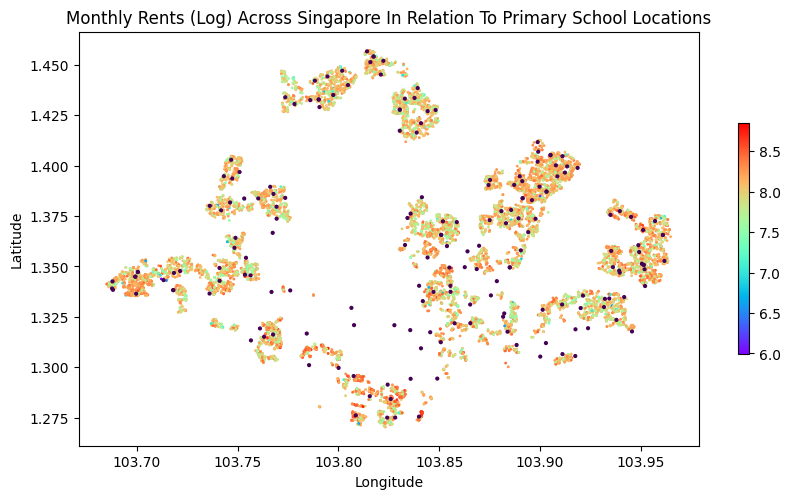

In [14]:
fig, ax = plt.subplots(figsize = (10, 10))
geo_df = GeoDataFrame({"monthly_rent": np.log(train_df["monthly_rent"])}, geometry=[Point(xy) for xy in zip(train_df['longitude'], train_df['latitude'])])
geo_df.plot(column='monthly_rent', ax=ax, cmap='rainbow', legend=True,  legend_kwds={'shrink': 0.3}, markersize=1)

aux_df = pd.read_csv("auxiliary-data/sg-primary-schools.csv")
aux_geo_df = GeoDataFrame({"schools": [1 for i in range(len(aux_df))]}, geometry=[Point(xy) for xy in zip(aux_df['longitude'], aux_df['latitude'])])
aux_geo_df.plot(column='schools', ax=ax, legend_kwds={'shrink': 0.3}, markersize=4)

plt.title('Monthly Rents (Log) Across Singapore In Relation To Primary School Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


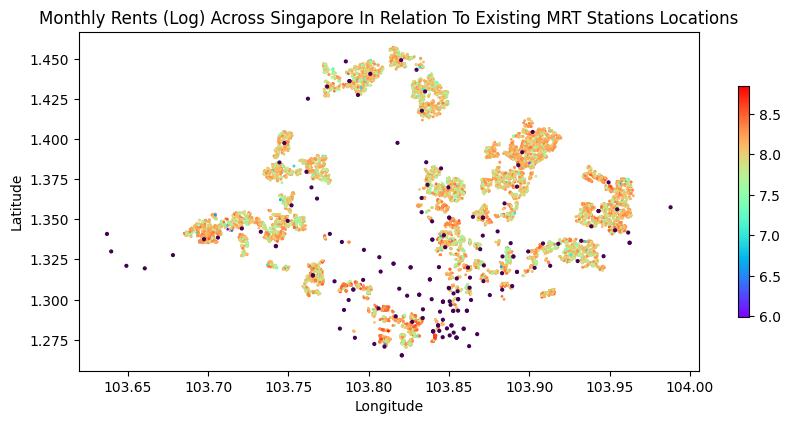

In [15]:
fig, ax = plt.subplots(figsize = (10, 10))
geo_df = GeoDataFrame({"monthly_rent": np.log(train_df["monthly_rent"])}, geometry=[Point(xy) for xy in zip(train_df['longitude'], train_df['latitude'])])
geo_df.plot(column='monthly_rent', ax=ax, cmap='rainbow', legend=True,  legend_kwds={'shrink': 0.3}, markersize=1)

aux_df = pd.read_csv("auxiliary-data/sg-mrt-existing-stations.csv")
aux_geo_df = GeoDataFrame({"schools": [1 for i in range(len(aux_df))]}, geometry=[Point(xy) for xy in zip(aux_df['longitude'], aux_df['latitude'])])
aux_geo_df.plot(column='schools', ax=ax, legend_kwds={'shrink': 0.3}, markersize=4)

plt.title('Monthly Rents (Log) Across Singapore In Relation To Existing MRT Stations Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

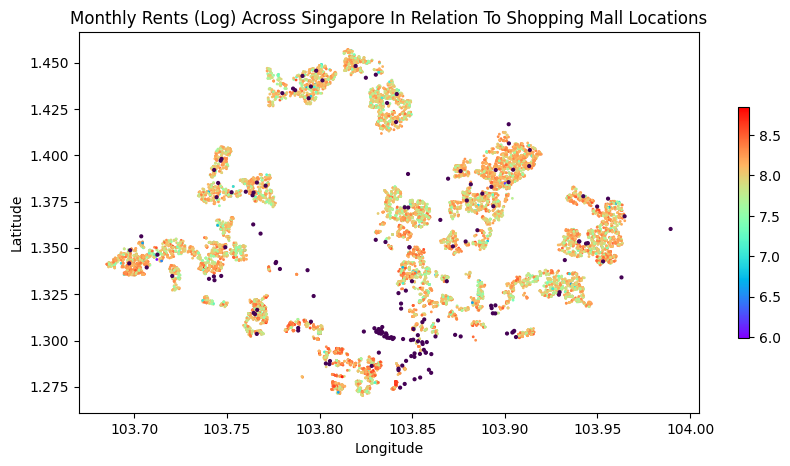

In [16]:
fig, ax = plt.subplots(figsize = (10, 10))
geo_df = GeoDataFrame({"monthly_rent": np.log(train_df["monthly_rent"])}, geometry=[Point(xy) for xy in zip(train_df['longitude'], train_df['latitude'])])
geo_df.plot(column='monthly_rent', ax=ax, cmap='rainbow', legend=True,  legend_kwds={'shrink': 0.3}, markersize=1)

aux_df = pd.read_csv("auxiliary-data/sg-shopping-malls.csv")
aux_geo_df = GeoDataFrame({"schools": [1 for i in range(len(aux_df))]}, geometry=[Point(xy) for xy in zip(aux_df['longitude'], aux_df['latitude'])])
aux_geo_df.plot(column='schools', ax=ax, legend_kwds={'shrink': 0.3}, markersize=4)

plt.title('Monthly Rents (Log) Across Singapore In Relation To Shopping Mall Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

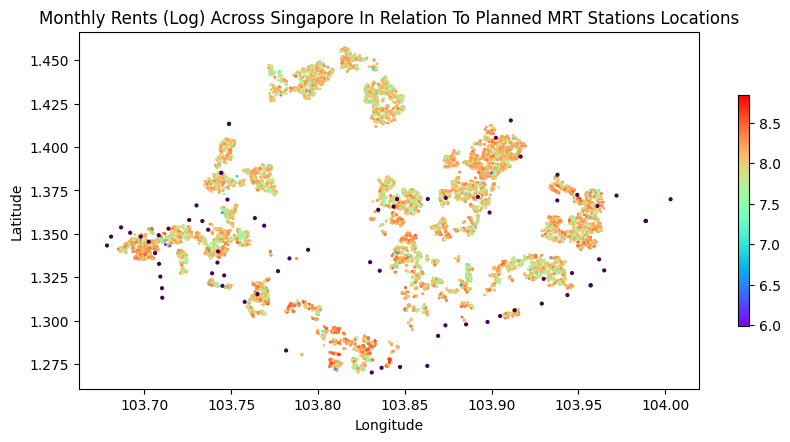

In [17]:
fig, ax = plt.subplots(figsize = (10, 10))
geo_df = GeoDataFrame({"monthly_rent": np.log(train_df["monthly_rent"])}, geometry=[Point(xy) for xy in zip(train_df['longitude'], train_df['latitude'])])
geo_df.plot(column='monthly_rent', ax=ax, cmap='rainbow', legend=True,  legend_kwds={'shrink': 0.3}, markersize=1)

aux_df = pd.read_csv("auxiliary-data/sg-mrt-planned-stations.csv")
aux_geo_df = GeoDataFrame({"schools": [1 for i in range(len(aux_df))]}, geometry=[Point(xy) for xy in zip(aux_df['longitude'], aux_df['latitude'])])
aux_geo_df.plot(column='schools', ax=ax, legend_kwds={'shrink': 0.3}, markersize=4)

plt.title('Monthly Rents (Log) Across Singapore In Relation To Planned MRT Stations Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()